#1. PASOS PREVIOS
Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Módulo de separación de datos
from sklearn.model_selection import train_test_split
# Módulo de Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
# Módulo de Reporte de métricas
from sklearn.metrics import classification_report
# Métricas
from sklearn import metrics
# Curva ROC
from sklearn.metrics import RocCurveDisplay
# muestra el gráfico en el cuaderno (no utiliza una ventana)
%matplotlib inline

#Carga de datos

In [ ]:
# El objetivo del dataset, es identificación de sexo en en base a las medidas del resto
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
df = pd.read_csv("ds_persona2_ML.csv")
df.head()

,Peso,Altura,Pie,Hombros,Brazos,Caderas,Ojos,Sexo
0,60,163,37,41,68,95,1,1
1,52,166,37,37,70,87,2,1
2,61,172,39,39,69,91,2,1
3,73,181,43,50,78,101,2,2
4,53,172,39,39,72,89,1,1


In [ ]:
# diagrama de dispersión en 3D: edad vs. fracción de eyección vs. sodio sérico
import plotly.express as px
fig = px.scatter_3d(df, x='Peso', y='Altura',
z='Pie', color='Sexo')
fig.update_traces(marker_size = 4)
fig.show()

#2. APLICACIÓN DEL MODELO PREDICTIVO
Separación de datos para emtrenamiento y test

In [ ]:
X = df.drop(['Sexo'], axis=1)
y = df['Sexo']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) #random_state=5
X_train.head()

,Peso,Altura,Pie,Hombros,Brazos,Caderas,Ojos
9,72,178,43,43,80,97,1
48,58,165,39,36,66,88,2
29,58,180,40,34,78,91,1
84,72,176,42,45,75,85,2
52,64,150,36,45,69,95,2


In [ ]:
y.head()

0    1
1    1
2    1
3    2
4    1
Name: Sexo, dtype: int64

# Entrenamiento con árbol de decisión

In [ ]:
# Configuración del modelo
modelo = MLPClassifier(max_iter=100)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Evaluación del modelo
modelo.score(X_test, y_test)

0.52

#3. PREDICCIÓN DEL MODELO

Predicción de datos de test

In [ ]:
pred = modelo.predict(X_test)
pd.DataFrame([pred,y_test])
#Primera fila Predicciones y segunda fila datos reales

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,2,1,1,2,1,1,1,2,1,...,2,1,2,1,2,1,2,1,2,2


#4. CÁLCULO Y VISUALIZACIÓN DE MÉTRICAS

Matriz de confusión


In [ ]:
# Evaluación del modelo
Exactitud= modelo.score(X_test, y_test)
MatrizConfusion = confusion_matrix(y_test,pred)
print('Matriz de Confusión:')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión:
[[13  0]
 [12  0]]
Exactitud =  0.52


Exactitud =  0.52


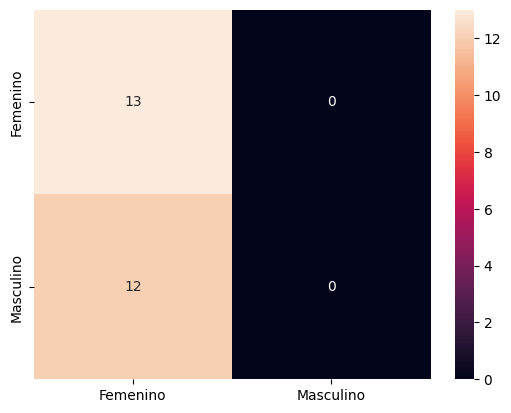

In [ ]:
import seaborn as sns
categorias = ['Femenino', 'Masculino']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias, annot=True)
print('Exactitud = ', Exactitud)

#Obtención de métricas

In [ ]:
Exactitud = metrics.accuracy_score(y_test,pred)
Precision = metrics.precision_score(y_test,pred)
Sensibilidad = metrics.recall_score(y_test,pred)
PuntuacionF1 = metrics.f1_score(y_test,pred)
Reporte = classification_report(y_test, pred)
print('Exactitud : ', Exactitud)
print('Precisión : ', Precision)
print('Sensibilidad : ', Sensibilidad)
print('Puntuación F1: ', PuntuacionF1)

Exactitud :  0.52
Precisión :  0.52
Sensibilidad :  1.0
Puntuación F1:  0.6842105263157895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print('Reporte de métricas: ')
print(Reporte)
#1 para identificar para mujeres y 2 para identificar varones. 73% de precisión en mujeres y 67% de precision en varones

Reporte de métricas: 
              precision    recall  f1-score   support

           1       0.52      1.00      0.68        13
           2       0.00      0.00      0.00        12

    accuracy                           0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25



#Curva ROC

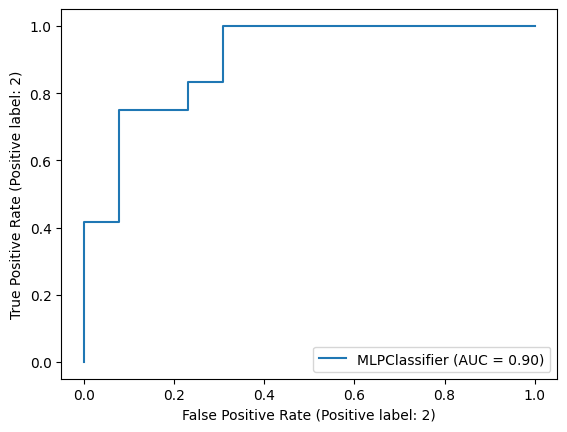

In [ ]:
RocCurveDisplay.from_estimator(modelo, X_test, y_test)
# Area bajo la curva, cual es la calidad en la oprediccion de valores correcto
# y en este caso es bastante alta 69%

#CASO 2 CLASIFIACIÓN MULTICLASE (digitos manuscritos)

Importación de datos

In [ ]:
datos = pd.read_csv("digito16x16.csv", sep=',', header=0)
datos.head()
#1 es blanco y 0  es negro
# el ouput es la columna p256 y el resto es input

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p248,p249,p250,p251,p252,p253,p254,p255,p256,digito
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#Visialización de digitos

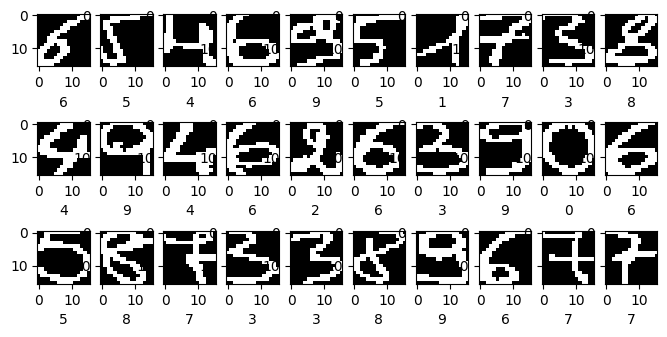

In [ ]:
import random
XX = datos.drop(['digito'], axis=1)
yy = datos['digito']
ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 10, figsize=(8,4))
for k in range(3):
  for j in range(10):
    azar = random.sample(range(ran),1)
    img = np.array(XX.iloc[azar].values)
    img = np.array(img).reshape(16,16)
    ax[k,j].imshow(img, cmap='gray')# imshow es mapa de calor
    ax[k,j].set_xlabel(yy[azar[0]])
plt.show()

#Separación de datos para test y trainig

In [ ]:
X = datos.drop(['digito'], axis=1) # Elmina la salida con drop
y = datos['digito']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

#Entrenamiento del modelo

In [ ]:
# Configuración del modelo
modelo = MLPClassifier(max_iter=1000)
# Entrenamiento
modelo.fit(X_train, y_train)
# Evaluación
modelo.score(X_test, y_test)
# en 1000 casos puede acertar y en 0.91.. se puede equivocar

0.9037656903765691

#Predicción del modelo

In [ ]:
pred = modelo.predict(X_test)
pd.DataFrame([pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
0,3,7,0,7,6,9,2,7,0,9,...,3,3,6,4,1,0,7,7,6,6
1,3,4,0,7,6,9,2,7,0,9,...,3,3,6,4,4,0,7,7,6,6


#Matriz de Confusión y Exactitud

In [ ]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  1  0  0  2  0  0]
 [ 0  0 41  0  1  0  0  0  2  0]
 [ 0  0  0 39  0  1  0  1  0  3]
 [ 0  3  0  0 41  0  0  1  0  0]
 [ 1  0  0  0  0 44  0  0  1  4]
 [ 1  0  0  0  2  2 53  0  0  0]
 [ 0  0  0  1  0  0  0 46  0  1]
 [ 0  2  2  1  1  0  0  0 32  1]
 [ 1  1  1  2  1  0  0  0  4 47]]
Exactitud =  0.9037656903765691


Exactitud =  0.9037656903765691


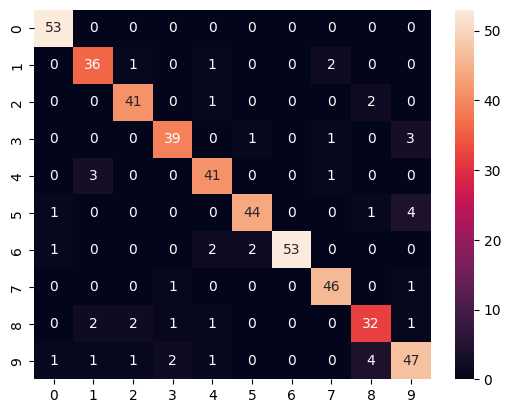

In [ ]:
import seaborn as sns
categorias = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias, annot=True)
print('Exactitud = ', Exactitud)
# la diagonal priuncipal y con los colres muestra la exactitud

#TAREA 1:

Obtenga las métricas: precision, sensibilidad, especificidad, puntuacionF1, y grafique la curva ROC para el
modelo de clasificación multiclase (Recomendación: revisar micropromedios o macropromedios en las
diapositivas del aula virtual)

#Precision

In [ ]:
Precision = metrics.precision_score(y_test,pred, average='weighted')
# Mostrar los resultados
print('Precisión = ', Precision)

Precisión =  0.9048230328577893


#Sensibilidad

In [ ]:
Sensibilidad = metrics.recall_score(y_test,pred, average='weighted')

print('Sensibilidad = ', Sensibilidad)

Sensibilidad =  0.9037656903765691


#Especificidad

In [ ]:
from sklearn.metrics import confusion_matrix

# Supongamos que ya tienes las variables y_test y pred definidas
MatrizConfusion = confusion_matrix(y_test, pred)

# Calcular Especificidad
especificidad = MatrizConfusion[0, 0] / (MatrizConfusion[0, 0] + MatrizConfusion[0, 1])

# Mostrar los resultados
print('Matriz de Confusión')
print(MatrizConfusion)
print('Especificidad = ', especificidad)

Matriz de Confusión
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  1  0  0  2  0  0]
 [ 0  0 41  0  1  0  0  0  2  0]
 [ 0  0  0 39  0  1  0  1  0  3]
 [ 0  3  0  0 41  0  0  1  0  0]
 [ 1  0  0  0  0 44  0  0  1  4]
 [ 1  0  0  0  2  2 53  0  0  0]
 [ 0  0  0  1  0  0  0 46  0  1]
 [ 0  2  2  1  1  0  0  0 32  1]
 [ 1  1  1  2  1  0  0  0  4 47]]
Especificidad =  1.0


#PuntuaciónF1

In [ ]:
PuntuacionF1 = metrics.f1_score(y_test,pred, average='weighted')
print('Puntuación F1: ', PuntuacionF1)

Puntuación F1:  0.9037340979144615


In [ ]:
Reporte = classification_report(y_test, pred)
print('Reporte de métricas: ')
print(Reporte)

Reporte de métricas: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.86      0.90      0.88        40
           2       0.91      0.93      0.92        44
           3       0.91      0.89      0.90        44
           4       0.87      0.91      0.89        45
           5       0.94      0.88      0.91        50
           6       1.00      0.91      0.95        58
           7       0.92      0.96      0.94        48
           8       0.82      0.82      0.82        39
           9       0.84      0.82      0.83        57

    accuracy                           0.90       478
   macro avg       0.90      0.90      0.90       478
weighted avg       0.90      0.90      0.90       478



#Grafique la curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = modelo.predict_proba(X_test) # Devuelve un array con 2 columnas de probabilidad estimada de clase negativa y positiva
n_clases = 10 # Es el número total de clases

# Inicializamos listas para almacenar las tasas de verdaderos positivos y falsos positivos para cada clase
tpr_list = [] # tasa de verdareros positivos
fpr_list = [] # tasa de falsos positivos

# Calculamos las tasas de verdaderos positivos y falsos positivos para cada clase
for i in range(n_clases):
    y_true_class = (y_test == i)
    y_scores_class = y_scores[:, i]
    fpr, tpr, _ = roc_curve(y_true_class, y_scores_class)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

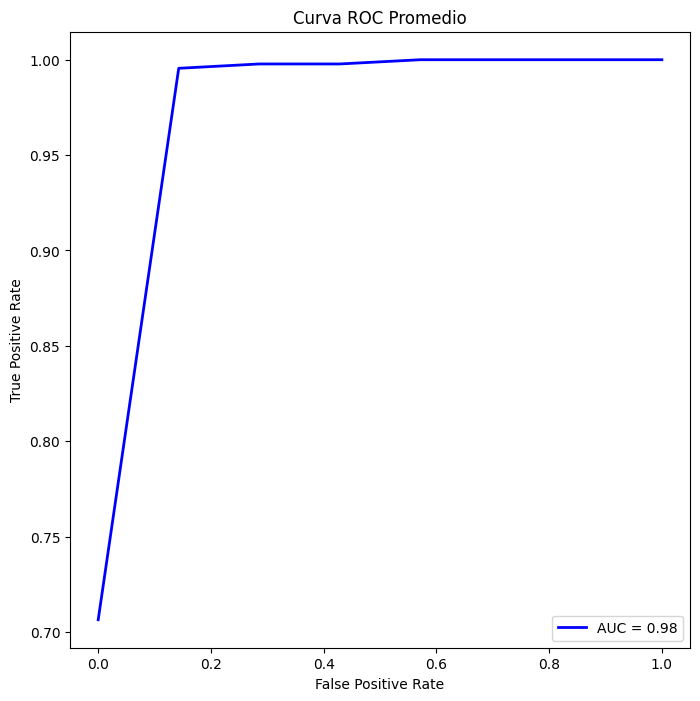

In [ ]:
# Encontramos el número mínimo de puntos para la interpolación
min_length = min(len(tpr) for tpr in tpr_list)

# Interpolamos las tasas de TPR y FPR
tpr_interp = [np.interp(np.linspace(0, 1, min_length), fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Calculamos la tasa de verdaderos positivos promedio (TPR)
tpr_avg = np.mean(tpr_interp, axis=0)

# Creamos un array de FPR que tenga la misma longitud que TPR
fpr_avg = np.linspace(0, 1, min_length)

# Calculamos el área bajo la curva ROC promedio (AUC)
roc_auc_avg = auc(fpr_avg, tpr_avg)

# Mostramos la curva ROC promedio
plt.figure(figsize=(8, 8))
plt.plot(fpr_avg, tpr_avg, color='blue', lw=2, label=f'AUC = {roc_auc_avg:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()

#5. TAREA 2

Repetir el procedimiento para los dataset: voz.csv, expresión facial.csv al final obtener las métricas:
exactitud, precisión, sensibilidad, especificidad, puntuación F1 y grafiqwue la curva ROC.

##Carga de datos de voz.csv


In [ ]:
# El objetivo del dataset, es identificación del genero en en base a las medidas del resto
df = pd.read_csv("voz.csv")
df.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,...,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,genero
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# diagrama de dispersión en 3D: minfun vs. maxfun vs. sodio sérico
import plotly.express as px
fig = px.scatter_3d(df, x='minfun', y='maxfun',
z='mindom', color='maxdom')
fig.update_traces(marker_size = 3)
fig.show()

##Aplicación del modelo predictivo

Separación de datos para entrenamiento y test

In [ ]:
X = df.drop(['genero'], axis=1)
y = df['genero']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75) #random_state=5
X_train.head()

,frecuencia_media,sd,mediana,Q1,Q3,IQR,skew,kurt,sp.ent,sfm,moda,centroide,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2340,0.225668,0.033966,0.233194,0.204776,0.248657,0.043881,2.046778,7.169019,0.843487,0.182467,0.233194,0.225668,0.175209,0.047572,0.274286,1.412224,0.023438,17.625000,17.601562,0.089880
2514,0.194937,0.034404,0.194902,0.181863,0.208971,0.027108,3.031623,13.742295,0.848110,0.254253,0.197647,0.194937,0.169901,0.051064,0.279070,2.174665,0.023438,13.265625,13.242188,0.106637
2772,0.181590,0.032103,0.175877,0.168468,0.190696,0.022228,3.394448,15.055466,0.819378,0.221279,0.175097,0.181590,0.170952,0.048338,0.277457,1.199574,0.023438,8.812500,8.789062,0.076000
2012,0.137556,0.086889,0.173206,0.045387,0.212586,0.167199,1.210790,3.693393,0.954676,0.704139,0.199571,0.137556,0.198798,0.077670,0.275862,0.520221,0.007812,3.226562,3.218750,0.194023
1527,0.121727,0.077395,0.108819,0.053303,0.200677,0.147374,3.539520,33.242832,0.953774,0.672605,0.000000,0.121727,0.109024,0.017957,0.262295,0.080631,0.007812,0.234375,0.226562,0.187821


In [ ]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: genero, dtype: object

##Entrenamiento con árbol de decisión

In [ ]:
# Configuración del modelo
modelo = MLPClassifier(max_iter=1000)
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Evaluación del modelo
modelo.score(X_test, y_test)

0.9204545454545454

##3. Predicción del modelo

Predicción de datos  de test

In [ ]:
pred = modelo.predict(X_test)
pd.DataFrame([pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,782,783,784,785,786,787,788,789,790,791
0,male,male,male,male,male,male,male,female,male,male,...,male,male,female,male,female,female,male,male,female,male
1,male,male,male,male,male,male,male,female,male,male,...,male,male,female,male,female,female,female,male,female,male


##4. Cálculo y visualización de métricas

Matriz de confución

In [ ]:
MatrizConfusion = confusion_matrix(y_test,pred)
print('Matriz de Confusión:')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión:
[[353  52]
 [ 11 376]]
Exactitud =  0.9225941422594143


Exactitud =  0.9225941422594143


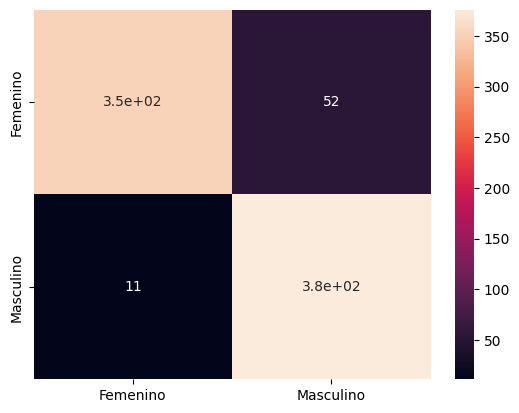

In [ ]:
import seaborn as sns
categorias = ['Femenino', 'Masculino']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias, annot=True)
print('Exactitud = ', Exactitud)


Obtención de métricas

In [ ]:
Exactitud = metrics.accuracy_score(y_test,pred)
Precision = metrics.precision_score(y_test,pred, pos_label='male')
Sensibilidad = metrics.recall_score(y_test,pred, pos_label='male')
PuntuacionF1 = metrics.f1_score(y_test,pred, pos_label='male')
Reporte = classification_report(y_test, pred)
print('Exactitud : ', Exactitud)
print('Precisión : ', Precision)
print('Sensibilidad : ', Sensibilidad)
print('Puntuación F1: ', PuntuacionF1)

Exactitud :  0.9204545454545454
Precisión :  0.8785046728971962
Sensibilidad :  0.9715762273901809
Puntuación F1:  0.9226993865030674


In [ ]:
print('Reporte de métricas: ')
print(Reporte)

Reporte de métricas: 
              precision    recall  f1-score   support

      female       0.97      0.87      0.92       405
        male       0.88      0.97      0.92       387

    accuracy                           0.92       792
   macro avg       0.92      0.92      0.92       792
weighted avg       0.93      0.92      0.92       792



Curva ROC

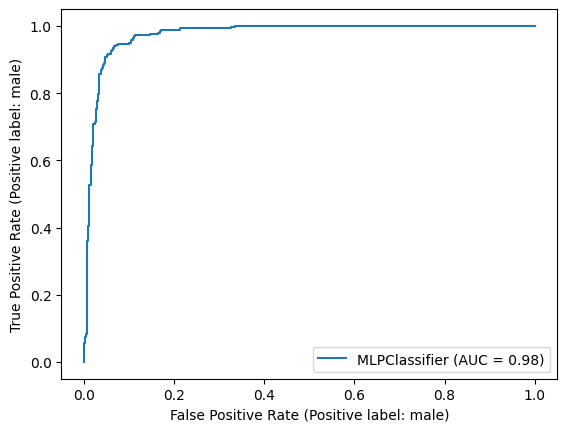

In [ ]:
RocCurveDisplay.from_estimator(modelo, X_test, y_test)

##Carga de datos de facial.csv

In [ ]:
# El objetivo del dataset, es identificación de sexo en en base a las medidas del resto
# sexo = f(peso, altura, pie, hombros, brazos, caderas, ojos)
datos = pd.read_csv("facial.csv", sep=',', header=0)
datos.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p2296,p2297,p2298,p2299,p2300,p2301,p2302,p2303,p2304,expresion
0,39,33,26,27,25,30,37,36,31,17,...,167,155,144,129,95,65,52,48,34,4
1,200,201,203,204,205,207,207,219,114,27,...,40,44,46,50,50,58,60,60,68,2
2,9,9,10,6,1,0,0,2,6,7,...,149,196,197,197,197,195,184,55,9,6
3,26,7,5,6,5,7,2,37,196,204,...,97,97,98,99,98,95,92,93,95,6
4,179,168,159,163,140,95,119,150,140,134,...,98,90,93,98,110,115,120,114,106,0


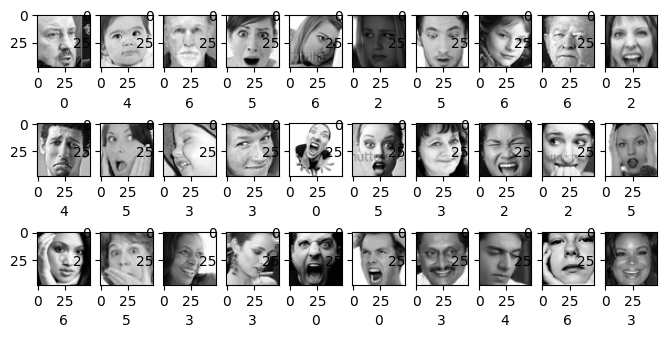

In [ ]:
import random
XX = datos.drop(['expresion'], axis=1)
yy = datos['expresion']
ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 10, figsize=(8, 4))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(ran), 1)
        img = np.array(XX.iloc[azar].values)
        img = np.array(img).reshape(48, 48)
        ax[k, j].imshow(img, cmap='gray')
        ax[k, j].set_xlabel(yy[azar[0]])
plt.show()

## Separación de datos para test y trainig

In [ ]:
X = datos.drop(['expresion'], axis=1)
y = datos['expresion']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

## Entrenamiento del modelo

In [ ]:
# Configuración del modelo
modelo = MLPClassifier(max_iter=10000)
# Entrenamiento
modelo.fit(X_train, y_train)
# Evaluación
modelo.score(X_test, y_test)

0.25404376784015226

In [ ]:
pred = modelo.predict(X_test)
pd.DataFrame([pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,9449,9450,9451,9452,9453,9454,9455,9456,9457,9458
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,2,6,3,0,3,0,3,1,5,4,...,4,3,3,3,5,6,3,3,2,2


In [ ]:
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[   2    0    0 1320    0    0    0]
 [   0    0    0  147    0    0    0]
 [   0    0    0 1342    0    0    0]
 [   1    0    0 2401    0    0    0]
 [   1    0    0 1590    0    0    0]
 [   0    0    0 1005    0    0    0]
 [   0    0    0 1650    0    0    0]]
Exactitud =  0.25404376784015226


Exactitud =  0.25404376784015226


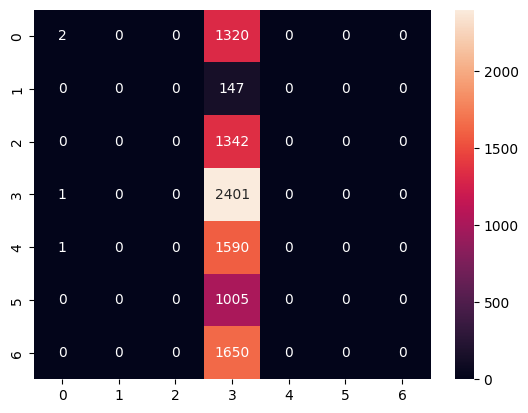

In [ ]:
import seaborn as sns
categorias = ['0', '1', '2', '3', '4', '5', '6']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias, annot=True,fmt='d')
print('Exactitud = ', Exactitud)

### Obtención de métricas

In [ ]:
Precision = metrics.precision_score(y_test, pred, average='weighted')
Sensibilidad = metrics.recall_score(y_test, pred, average='weighted')
PuntuacionF1 = metrics.f1_score(y_test, pred, average='weighted')

print('Precisión : ', Precision)
print('Sensibilidad : ', Sensibilidad)
print('Puntuación F1: ', PuntuacionF1)

Precisión :  0.1343654925549432
Sensibilidad :  0.25404376784015226
Puntuación F1:  0.10326469122221205


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Reporte = classification_report(y_test, pred)
print('Reporte de métricas: ')
print(Reporte)

Reporte de métricas: 
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1322
           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00      1342
           3       0.25      1.00      0.40      2402
           4       0.00      0.00      0.00      1591
           5       0.00      0.00      0.00      1005
           6       0.00      0.00      0.00      1650

    accuracy                           0.25      9459
   macro avg       0.11      0.14      0.06      9459
weighted avg       0.13      0.25      0.10      9459



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Curva de ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = modelo.predict_proba(X_test) # Devuelve un array con 2 columnas de probabilidad estimada de clase negativa y positiva
n_clases = 7 # Es el número total de clases

# Inicializamos listas para almacenar las tasas de verdaderos positivos y falsos positivos para cada clase
tpr_list = [] # tasa de verdareros positivos
fpr_list = [] # tasa de falsos positivos

# Calculamos las tasas de verdaderos positivos y falsos positivos para cada clase
for i in range(n_clases):
    y_true_class = (y_test == i)
    y_scores_class = y_scores[:, i]
    fpr, tpr, _ = roc_curve(y_true_class, y_scores_class)
    tpr_list.append(tpr)
    fpr_list.append(fpr)

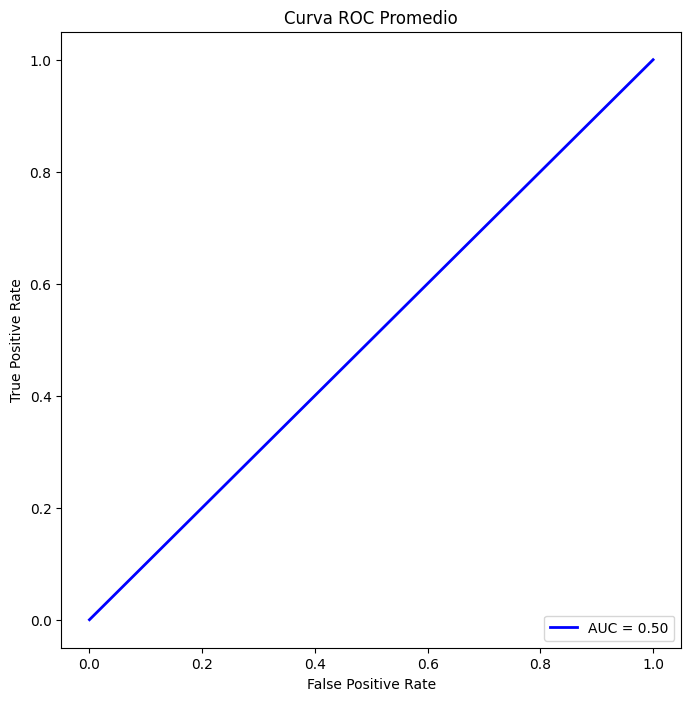

In [ ]:
# Encontramos el número mínimo de puntos para la interpolación
min_length = min(len(tpr) for tpr in tpr_list)

# Interpolamos las tasas de TPR y FPR
tpr_interp = [np.interp(np.linspace(0, 1, min_length), fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)]

# Calculamos la tasa de verdaderos positivos promedio (TPR)
tpr_avg = np.mean(tpr_interp, axis=0)

# Creamos un array de FPR que tenga la misma longitud que TPR
fpr_avg = np.linspace(0, 1, min_length)

# Calculamos el área bajo la curva ROC promedio (AUC)
roc_auc_avg = auc(fpr_avg, tpr_avg)

# Mostramos la curva ROC promedio
plt.figure(figsize=(8, 8))
plt.plot(fpr_avg, tpr_avg, color='blue', lw=2, label=f'AUC = {roc_auc_avg:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Promedio')
plt.legend(loc="lower right")
plt.show()